In [13]:
import jax.numpy as jnp
from jax import grad, jit, vmap, lax
from jax import random
import numpy as np
import matplotlib.pyplot as plt
import av
import Sandpile as sp
import time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


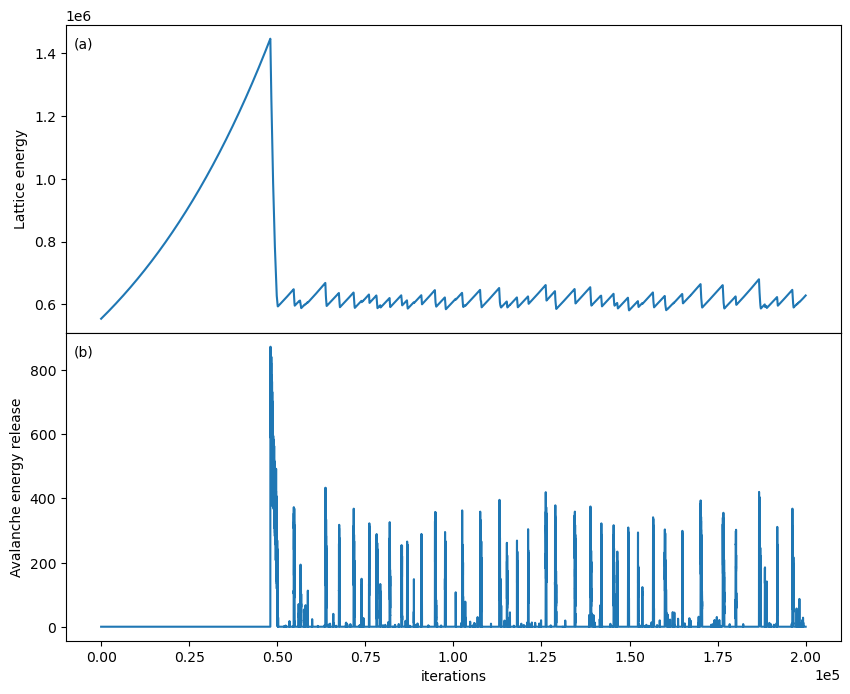

In [4]:
a1 = av.av_model(100, Nx=20, Ny=20)
a1.eps_drive = 1e-5
a1.sigma2 = -1
a1.D_nc = 1
# a1.name = 'D12'
a1.do_soc(Niter=int(2e5), doplot=1, finish_with_soc=True)
# saved_state = np.copy(a1.B)

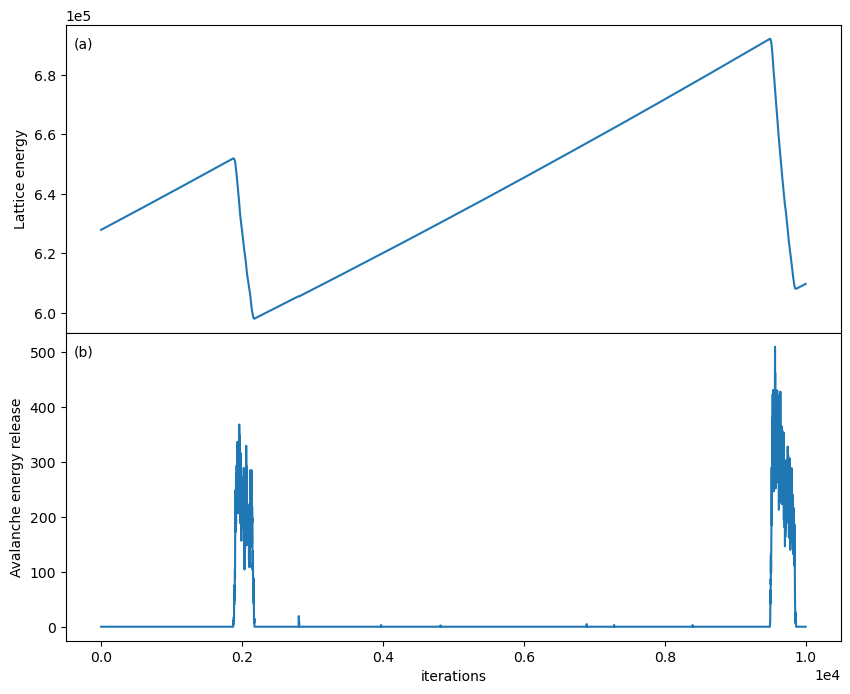

0.25


In [5]:
start = time.time()
a1.do_soc(Niter=int(1e4), doplot=1, finish_with_soc=True)
print(round(time.time()-start, 2))

In [33]:
aJax = sp.Sandpile(20)
aJax.B = np.copy(a1.B)
start = time.time()
rel_e, lat_e = aJax.loop_(1e4, verbose=True)
print(round(time.time()-start, 2))
fig, axs = plt.subplots(2,1, sharex=True)
axs[0].plot(lat_e)
axs[1].plot(rel_e)
plt.show()

ValueError: Non-hashable static arguments are not supported. An error occurred during a call to 'e_total' while trying to hash an object of type <class 'jaxlib.xla_extension.DeviceArray'>, 0.8. The error was:
TypeError: unhashable type: 'DeviceArray'
